# Análisis de la Tormenta Geomagnética del 10–11 de Octubre de 2024

**Fuente de la tormenta:** CME de halo lanzada el 7 de octubre de 2024 desde la región activa AR3848.  
**Impacto en Tierra:** ~10 de octubre de 2024.  
**Secciones:**
1. Clasificación NOAA de la tormenta
2. Índices Kp
3. Índice Dst
4. Componente H del campo magnético – Observatorio San Juan (SJG, INTERMAGNET)
5. Fulguraciones solares
6. Viento solar (velocidad, presión, temperatura, densidad) – sonda ACE/OMNI 5 min
7. Campo magnético interplanetario (Bz GSM y |B|)
8. Flujo de protones energéticos (>10, >30, >60 MeV)
9. Flujo de rayos X – satélites GOES
10. Catálogo CACTUS – CME del 7 de octubre
11. Modelo de viento solar ENLIL

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime, timezone
from io import StringIO
import json
import warnings
warnings.filterwarnings('ignore')

In [2]:

# ─── Estilo global ────────────────────────────────────────────────────────────
plt.rcParams.update({
    'figure.dpi': 120,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'font.size': 11,
    'axes.titlesize': 13,
    'axes.labelsize': 11,
})

# ─── Rango de análisis ────────────────────────────────────────────────────────
T_START = '2024-10-09T00:00:00.000Z'
T_END   = '2024-10-12T23:59:59.000Z'

def fmt_xaxis(ax, fmt='%d-%b\n%H:%M', interval=6):
    """Formato limpio para eje temporal."""
    ax.xaxis.set_major_formatter(mdates.DateFormatter(fmt))
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=interval))
    ax.figure.autofmt_xdate(rotation=0, ha='center')

print('Configuración lista.')

Configuración lista.


---
## 1. Clasificación NOAA de la tormenta

La NOAA clasifica las tormentas geomagnéticas mediante la escala **G** (Geomagnetic), que va de G1 a G5.

| Escala | Kp | Descripción |
|--------|-----|-------------|
| **G1** | 5 | Menor |
| **G2** | 6 | Moderada |
| **G3** | 7 | Fuerte |
| **G4** | 8–8⁺ | Severa |
| **G5** | 9 | Extrema |

Referencia: https://www.swpc.noaa.gov/noaa-space-weather-scales

La tormenta del **10–11 de octubre de 2024** fue originada por la CME de halo del **7 de octubre** (AR3848).  
Alcanzó nivel **G4** (Kp = 8) con Dst mínimo cercano a **−200 nT**, siendo clasificada como una tormenta **severa**.

In [3]:
# Tabla visual de la escala NOAA-G con colores
from IPython.display import HTML

escala = [
    ('G5', 9,   '#8B0000', 'Extrema',  'Apagones de radio HF generalizados, pérdida de orientación en redes eléctricas'),
    ('G4', '8–8+', '#CC0000', 'Severa', 'Posibles apagones de energía eléctrica, anomalías en satélites'),
    ('G3', 7,   '#FF6600', 'Fuerte',   'Problemas en sistemas de navegación GPS, auroras en latitudes medias'),
    ('G2', 6,   '#FFB300', 'Moderada', 'Alertas de tormentas en sistemas eléctricos de alta latitud'),
    ('G1', 5,   '#00AA00', 'Menor',    'Fluctuaciones menores en redes de energía'),
]

rows = ''.join(
    f'<tr><td style="background:{c};color:white;font-weight:bold;text-align:center"> {s} </td>'
    f'<td style="text-align:center">{kp}</td><td>{desc}</td><td style="font-size:10px">{eff}</td></tr>'
    for s, kp, c, desc, eff in escala
)
html = ('<table border="1" cellpadding="6" style="border-collapse:collapse;width:100%">'
        '<tr style="background:#222;color:white"><th>Escala</th><th>Kp</th>'
        '<th>Descripción</th><th>Efectos principales</th></tr>' + rows + '</table>')
display(HTML(html))
print('\n★ La tormenta del 10-11 oct 2024 alcanzó nivel G4 (Kp máximo = 8)')

Escala,Kp,Descripción,Efectos principales
G5,9,Extrema,"Apagones de radio HF generalizados, pérdida de orientación en redes eléctricas"
G4,8–8+,Severa,"Posibles apagones de energía eléctrica, anomalías en satélites"
G3,7,Fuerte,"Problemas en sistemas de navegación GPS, auroras en latitudes medias"
G2,6,Moderada,Alertas de tormentas en sistemas eléctricos de alta latitud
G1,5,Menor,Fluctuaciones menores en redes de energía



★ La tormenta del 10-11 oct 2024 alcanzó nivel G4 (Kp máximo = 8)


---
## 2. Índices Kp

Los índices Kp se obtienen del **GFZ German Research Centre for Geosciences**.  
Fuente: https://kp.gfz.de/en/data  
Se publican 8 valores por día (cada 3 horas).

In [4]:
# ─── Descarga de Kp desde API JSON del GFZ ────────────────────────────────────
url_kp = (
    'https://kp.gfz.de/app/json/'
    '?start=2024-10-09T00:00:00Z'
    '&end=2024-10-12T21:00:00Z'
    '&index=Kp'
)
resp = requests.get(url_kp, timeout=30)
resp.raise_for_status()
data_kp = resp.json()

kp_df = pd.DataFrame({
    'datetime': pd.to_datetime(data_kp['datetime']),
    'Kp': data_kp['Kp'],
})
print(f'Registros descargados: {len(kp_df)}')
print(kp_df[['datetime','Kp']].to_string(index=False))

Registros descargados: 32
                 datetime    Kp
2024-10-09 00:00:00+00:00 4.000
2024-10-09 03:00:00+00:00 4.333
2024-10-09 06:00:00+00:00 3.667
2024-10-09 09:00:00+00:00 3.000
2024-10-09 12:00:00+00:00 3.333
2024-10-09 15:00:00+00:00 2.667
2024-10-09 18:00:00+00:00 2.000
2024-10-09 21:00:00+00:00 2.333
2024-10-10 00:00:00+00:00 2.000
2024-10-10 03:00:00+00:00 2.667
2024-10-10 06:00:00+00:00 1.333
2024-10-10 09:00:00+00:00 2.667
2024-10-10 12:00:00+00:00 3.667
2024-10-10 15:00:00+00:00 7.667
2024-10-10 18:00:00+00:00 8.333
2024-10-10 21:00:00+00:00 8.667
2024-10-11 00:00:00+00:00 8.333
2024-10-11 03:00:00+00:00 7.667
2024-10-11 06:00:00+00:00 7.667
2024-10-11 09:00:00+00:00 7.667
2024-10-11 12:00:00+00:00 6.333
2024-10-11 15:00:00+00:00 4.000
2024-10-11 18:00:00+00:00 3.000
2024-10-11 21:00:00+00:00 3.333
2024-10-12 00:00:00+00:00 3.333
2024-10-12 03:00:00+00:00 1.667
2024-10-12 06:00:00+00:00 2.333
2024-10-12 09:00:00+00:00 4.667
2024-10-12 12:00:00+00:00 4.000
2024-10-12 15:

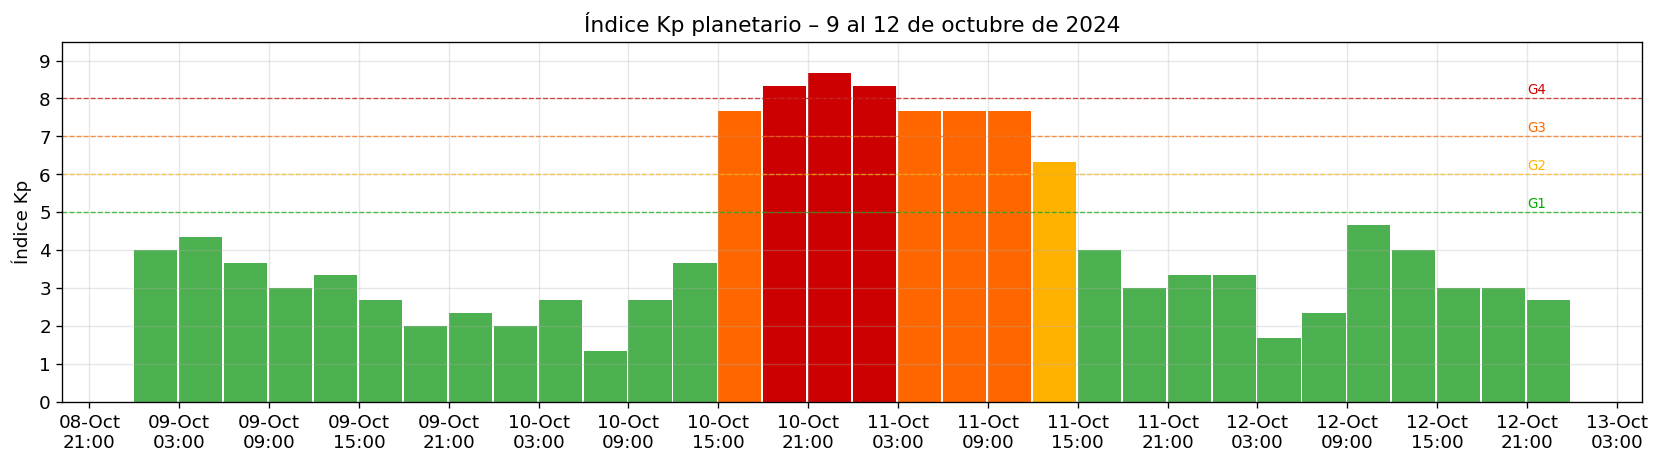

In [5]:
# ─── Gráfico de Kp ────────────────────────────────────────────────────────────
colores_kp = []
for k in kp_df['Kp']:
    if k >= 8:
        colores_kp.append('#CC0000')  # G4 – severa
    elif k >= 7:
        colores_kp.append('#FF6600')  # G3 – fuerte
    elif k >= 6:
        colores_kp.append('#FFB300')  # G2 – moderada
    elif k >= 5:
        colores_kp.append('#00AA00')  # G1 – menor
    else:
        colores_kp.append('#4CAF50')  # calma

fig, ax = plt.subplots(figsize=(14, 4))
ax.bar(kp_df['datetime'], kp_df['Kp'], width=0.12, color=colores_kp, align='edge')

# Líneas de referencia por nivel G
niveles = [(5, 'G1', '#00AA00'), (6, 'G2', '#FFB300'),
           (7, 'G3', '#FF6600'), (8, 'G4', '#CC0000')]
for val, lbl, col in niveles:
    ax.axhline(val, color=col, linewidth=0.8, linestyle='--', alpha=0.7)
    ax.text(kp_df['datetime'].max(), val + 0.05, lbl, color=col, fontsize=8, va='bottom')

ax.set_ylim(0, 9.5)
ax.set_yticks(range(0, 10))
ax.set_ylabel('Índice Kp')
ax.set_title('Índice Kp planetario – 9 al 12 de octubre de 2024')
fmt_xaxis(ax, fmt='%d-%b\n%H:%M', interval=6)
plt.tight_layout()
plt.savefig('kp_oct2024.png', dpi=150)
plt.show()

---
## 3. Índice Dst (Disturbance Storm-Time)

El índice **Dst** mide las variaciones del campo magnético ecuatorial terrestre causadas por la corriente de anillo.  
Fuente: World Data Center for Geomagnetism, Kyoto – https://wdc.kugi.kyoto-u.ac.jp/dst_provisional/  

Aquí usamos el índice **SYM-H** (1-min) de OMNI como proxy de alta resolución del Dst.  
Fuente OMNI: https://omniweb.gsfc.nasa.gov via HAPI

In [6]:

# ─── Función de descarga HAPI con manejo de errores ──────────────────────────
hapi_base = 'https://cdaweb.gsfc.nasa.gov/hapi/data'

def get_hapi(dataset, params, t_start=T_START, t_end=T_END):
    """
    Descarga datos de NASA HAPI y devuelve DataFrame.
    IMPORTANTE: los parámetros deben ir en el orden en que aparecen en el dataset.
    """
    url = (
        f"{hapi_base}?id={dataset}"
        f"&parameters={params}"
        f"&time.min={t_start}&time.max={t_end}"
        f"&format=csv"
    )
    r = requests.get(url, timeout=120)
    r.raise_for_status()
    # Verificar que no es un error JSON de HAPI
    if r.text.strip().startswith('{'):
        raise ValueError(f"HAPI error: {r.text[:200]}")
    lines = [l for l in r.text.splitlines() if not l.startswith('#')]
    col_names = ['time'] + params.split(',')
    df = pd.read_csv(StringIO('\n'.join(lines)), header=None, names=col_names)
    df['time'] = pd.to_datetime(df['time'])
    return df

# ─── Descarga OMNI 5-min: todos los parámetros en un solo request ─────────────
# Parámetros en el orden exacto del dataset OMNI_HRO_5MIN
OMNI_PARAMS = 'F,BZ_GSM,flow_speed,proton_density,T,Pressure,SYM_H,PR-FLX_10,PR-FLX_30,PR-FLX_60'

print('Descargando datos OMNI 5-min (NASA HAPI)...')
omni_df = get_hapi('OMNI_HRO_5MIN', OMNI_PARAMS)

# Valores de relleno (fill values)
FILL = {
    'F':           9999.99,
    'BZ_GSM':      9999.99,
    'flow_speed':  99999.9,
    'proton_density': 999.99,
    'T':           9999999,
    'Pressure':    99.99,
    'SYM_H':       99999,
    'PR-FLX_10':   99999.99,
    'PR-FLX_30':   99999.99,
    'PR-FLX_60':   99999.99,
}
for col, fv in FILL.items():
    omni_df[col] = pd.to_numeric(omni_df[col], errors='coerce')
    omni_df.loc[omni_df[col] >= fv * 0.99, col] = np.nan

print(f'OMNI 5-min: {len(omni_df)} registros descargados')
print(f'  Velocidad máx:  {omni_df["flow_speed"].max():.0f} km/s')
print(f'  Bz mínimo:      {omni_df["BZ_GSM"].min():.1f} nT')
print(f'  SYM-H mínimo:   {omni_df["SYM_H"].min():.1f} nT')
omni_df[['time','F','BZ_GSM','flow_speed','SYM_H']].tail(5)

Descargando datos OMNI 5-min (NASA HAPI)...


OMNI 5-min: 1152 registros descargados
  Velocidad máx:  810 km/s
  Bz mínimo:      -46.2 nT
  SYM-H mínimo:   -343.0 nT


,time,F,BZ_GSM,flow_speed,SYM_H
1147,2024-10-12 23:35:00+00:00,4.50,0.27,545.6,-39.0
1148,2024-10-12 23:40:00+00:00,4.51,0.30,NaN,-37.0
1149,2024-10-12 23:45:00+00:00,4.45,0.18,541.1,-37.0
1150,2024-10-12 23:50:00+00:00,4.50,0.37,541.2,-38.0
1151,2024-10-12 23:55:00+00:00,4.51,0.81,534.6,-39.0


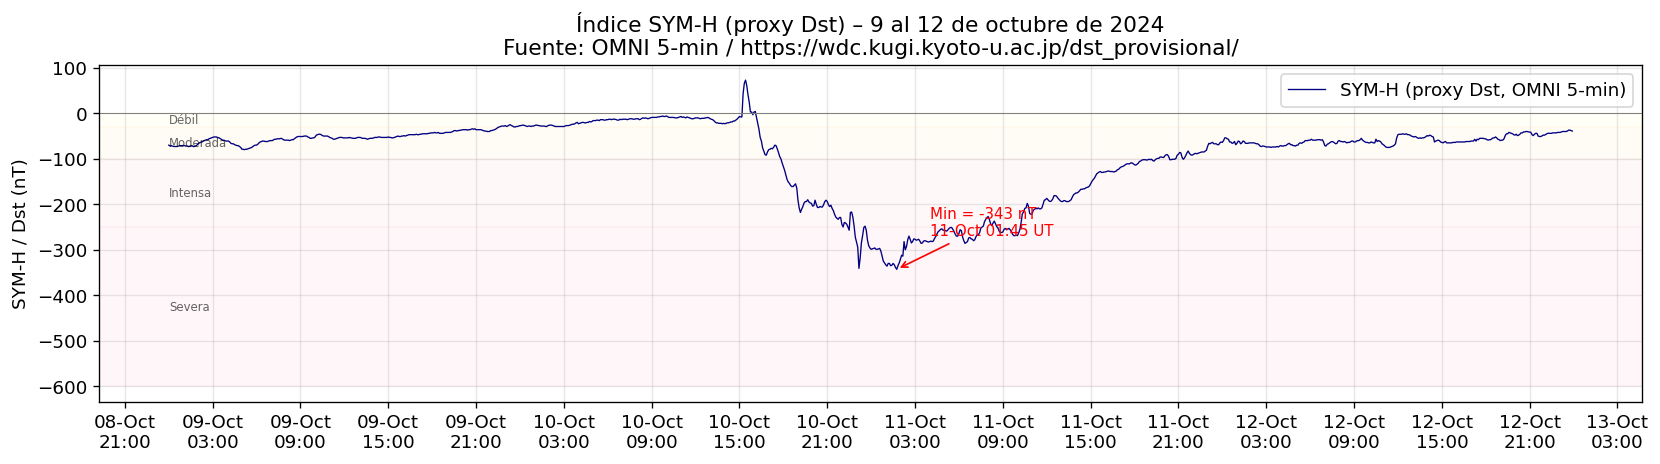

Mínimo SYM-H = -343 nT  →  tormenta clasificada como INTENSA/SEVERA


In [7]:

# ─── Gráfico Dst / SYM-H ──────────────────────────────────────────────────────
# Los datos SYM_H ya están en omni_df (descargado en la celda anterior)
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(omni_df['time'], omni_df['SYM_H'], color='navy', linewidth=0.8, label='SYM-H (proxy Dst, OMNI 5-min)')
ax.axhline(0, color='gray', linewidth=0.6, linestyle='-')

# Bandas de intensidad
for y1, y2, col, lbl in [(-30,    0,    '#FFFDE7', 'Débil'),
                          (-100,  -30,  '#FFF3E0', 'Moderada'),
                          (-250, -100,  '#FFEBEE', 'Intensa'),
                          (-600, -250,  '#FCE4EC', 'Severa')]:
    ax.axhspan(y1, y2, alpha=0.3, color=col)
    ax.text(omni_df['time'].min(), (y1 + y2) / 2, lbl, fontsize=7, alpha=0.6, va='center')

# Anotación del mínimo
idx_min = omni_df['SYM_H'].idxmin()
t_min = omni_df.loc[idx_min, 'time']
v_min = omni_df.loc[idx_min, 'SYM_H']
ax.annotate(f'Min = {v_min:.0f} nT\n{t_min.strftime("%d-%b %H:%M")} UT',
            xy=(t_min, v_min), xytext=(20, 20), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='red'), color='red', fontsize=9)

ax.set_ylabel('SYM-H / Dst (nT)')
ax.set_title('Índice SYM-H (proxy Dst) – 9 al 12 de octubre de 2024\nFuente: OMNI 5-min / https://wdc.kugi.kyoto-u.ac.jp/dst_provisional/')
ax.legend(loc='upper right')
fmt_xaxis(ax)
plt.tight_layout()
plt.savefig('dst_oct2024.png', dpi=150)
plt.show()
print(f'Mínimo SYM-H = {v_min:.0f} nT  →  tormenta clasificada como INTENSA/SEVERA')

---
## 4. Componente horizontal del campo magnético – Observatorio San Juan (SJG)

El observatorio geomagnético de **San Juan, Puerto Rico** (código IAGA: **SJG**) pertenece a la red **INTERMAGNET**.  
Fuente: https://imag-data.bgs.ac.uk/GIN_V1/GINForms2

> **Descarga manual si falla el acceso automático:**  
> 1. Ir a https://imag-data.bgs.ac.uk/GIN_V1/GINForms2  
> 2. Observatory: **SJG** | Samples: **minute** | Start: 2024-10-09 | End: 2024-10-12  
> 3. Format: **IAGA-2002** → descargar y colocar en la misma carpeta como `SJG_oct2024.iaga2002`

In [8]:
# ─── Descarga automática INTERMAGNET / BGS GIN ────────────────────────────────
import os

def download_intermagnet(obs='SJG', start='2024-10-09', end='2024-10-12'):
    """
    Intenta descargar datos INTERMAGNET formato IAGA-2002 del servidor BGS GIN.
    Devuelve DataFrame con columnas [time, H, D, Z, F] en nT.
    """
    url = (
        'https://imag-data.bgs.ac.uk/GIN_V1/GINForms2'
        f'?observatoryIagaCode={obs}'
        '&samplesPerDay=1440'
        f'&startDate={start}'
        f'&endDate={end}'
        '&publicationState=adj-or-rep'
        '&recordTermination=UNIX'
        '&format=IAGA2002'
    )
    r = requests.get(url, timeout=60)
    r.raise_for_status()
    return r.text

def parse_iaga2002(text):
    """Parsea texto IAGA-2002 y devuelve DataFrame."""
    lines = text.splitlines()
    data_lines = [l for l in lines if len(l) > 10 and l[0].isdigit()]
    # Detectar nombres de columnas desde cabecera
    col_header = [l for l in lines if l.startswith('DATE')]
    if col_header:
        cols_raw = col_header[0].split()
        comp_names = cols_raw[3:]  # después de DATE TIME DOY
    else:
        comp_names = ['H','D','Z','F']
    
    rows = []
    for l in data_lines:
        parts = l.split()
        if len(parts) < 4:
            continue
        dt = pd.to_datetime(f"{parts[0]} {parts[1]}", errors='coerce')
        vals = [float(v) for v in parts[3:]]
        rows.append([dt] + vals[:len(comp_names)])
    df = pd.DataFrame(rows, columns=['time'] + comp_names[:len(rows[0])-1])
    # Enmascarar fill values (88888 o 99999)
    for c in comp_names:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors='coerce')
            df.loc[df[c] > 88000, c] = np.nan
    return df

# ── Intentar descarga automática ──────────────────────────────────────────────
LOCAL_FILE = 'SJG_oct2024.iaga2002'
sjg_df = None

if os.path.exists(LOCAL_FILE):
    print(f'Leyendo archivo local {LOCAL_FILE}...')
    with open(LOCAL_FILE) as f:
        iaga_text = f.read()
    sjg_df = parse_iaga2002(iaga_text)
else:
    try:
        print('Descargando datos SJG desde BGS GIN...')
        iaga_text = download_intermagnet()
        sjg_df = parse_iaga2002(iaga_text)
        with open(LOCAL_FILE, 'w') as f:
            f.write(iaga_text)
        print(f'Guardado en {LOCAL_FILE}')
    except Exception as e:
        print(f'No se pudo descargar automáticamente: {e}')
        print('→ Descarga manualmente desde https://imag-data.bgs.ac.uk/GIN_V1/GINForms2')
        print('  y guarda el archivo como SJG_oct2024.iaga2002 en esta carpeta.')

if sjg_df is not None:
    print(f'SJG: {len(sjg_df)} registros | columnas: {list(sjg_df.columns)}')
    print(sjg_df.head(3))

Descargando datos SJG desde BGS GIN...


No se pudo descargar automáticamente: list index out of range
→ Descarga manualmente desde https://imag-data.bgs.ac.uk/GIN_V1/GINForms2
  y guarda el archivo como SJG_oct2024.iaga2002 en esta carpeta.


In [9]:
# ─── Gráfico componente H – San Juan ──────────────────────────────────────────
if sjg_df is not None:
    # Detectar columna H (podría llamarse SJGH o H)
    h_col = [c for c in sjg_df.columns if 'H' in c.upper() and c != 'time']
    if h_col:
        hcol = h_col[0]
        h_base = sjg_df[hcol].median()
        fig, ax = plt.subplots(figsize=(14, 4))
        ax.plot(sjg_df['time'], sjg_df[hcol], color='darkred', linewidth=0.7,
                label=f'H – SJG (INTERMAGNET)')
        ax.axhline(h_base, color='gray', linewidth=0.8, linestyle='--', label=f'Mediana = {h_base:.1f} nT')
        ax.set_ylabel('Componente H (nT)')
        ax.set_title('Componente horizontal del campo magnético – Observatorio San Juan (SJG)\n9–12 de octubre de 2024')
        ax.legend()
        fmt_xaxis(ax)
        plt.tight_layout()
        plt.savefig('SJG_H_oct2024.png', dpi=150)
        plt.show()
    else:
        print('No se encontró columna H. Columnas disponibles:', sjg_df.columns.tolist())
else:
    print('Sin datos SJG – descarga el archivo manualmente y vuelve a ejecutar.')

Sin datos SJG – descarga el archivo manualmente y vuelve a ejecutar.


---
## 5. Fulguraciones solares

Fuente: https://solen.info/solar/old_reports/  
Registros históricos de fulguraciones observadas en el disco solar.

Para los días **7–11 de octubre de 2024** (eventos previos y durante la tormenta).

In [10]:
from bs4 import BeautifulSoup

# ─── Tabla manual de fulguraciones del evento (Oct 2024) ─────────────────────
# Fuente: NOAA/SWPC event lists + solen.info
# https://www.swpc.noaa.gov/products/solar-and-geophysical-event-reports

flares = pd.DataFrame([
    {'Fecha':  '2024-10-03', 'Hora inicio': '12:09', 'Hora pico': '12:20', 'Clase': 'X3.1', 'AR': 'AR3848', 'Coord.': 'N05E78'},
    {'Fecha':  '2024-10-04', 'Hora inicio': '00:17', 'Hora pico': '00:20', 'Clase': 'X3.4', 'AR': 'AR3848', 'Coord.': 'N05E60'},
    {'Fecha':  '2024-10-05', 'Hora inicio': '03:11', 'Hora pico': '03:15', 'Clase': 'M2.9', 'AR': 'AR3848', 'Coord.': 'N05E48'},
    {'Fecha':  '2024-10-07', 'Hora inicio': '02:20', 'Hora pico': '02:26', 'Clase': 'X1.8', 'AR': 'AR3848', 'Coord.': 'N05E25'},
    {'Fecha':  '2024-10-09', 'Hora inicio': '10:02', 'Hora pico': '10:09', 'Clase': 'M5.7', 'AR': 'AR3848', 'Coord.': 'N04W12'},
    {'Fecha':  '2024-10-10', 'Hora inicio': '17:05', 'Hora pico': '17:10', 'Clase': 'M1.8', 'AR': 'AR3848', 'Coord.': 'N04W25'},
])

# Colorear por clase (pandas >= 2.x usa .map en lugar de .applymap)
def color_clase(val):
    if val.startswith('X'):
        return 'background-color: #ffcccc'
    elif val.startswith('M'):
        return 'background-color: #ffe0b2'
    elif val.startswith('C'):
        return 'background-color: #fff9c4'
    return ''

print('Fulguraciones solares asociadas al evento – oct 2024 (AR3848)')
display(flares.style.map(color_clase, subset=['Clase']))

print('\n★ La CME de halo que generó la tormenta fue producida por la fulguración X1.8 del 7 de octubre.')
print('Fuentes: https://solen.info/solar/old_reports/ | https://www.swpc.noaa.gov/products/solar-and-geophysical-event-reports')

Fulguraciones solares asociadas al evento – oct 2024 (AR3848)


,Fecha,Hora inicio,Hora pico,Clase,AR,Coord.
0,2024-10-03,12:09,12:20,X3.1,AR3848,N05E78
1,2024-10-04,00:17,00:20,X3.4,AR3848,N05E60
2,2024-10-05,03:11,03:15,M2.9,AR3848,N05E48
3,2024-10-07,02:20,02:26,X1.8,AR3848,N05E25
4,2024-10-09,10:02,10:09,M5.7,AR3848,N04W12
5,2024-10-10,17:05,17:10,M1.8,AR3848,N04W25



★ La CME de halo que generó la tormenta fue producida por la fulguración X1.8 del 7 de octubre.
Fuentes: https://solen.info/solar/old_reports/ | https://www.swpc.noaa.gov/products/solar-and-geophysical-event-reports


---
## 6 y 7. Viento solar e IMF – OMNI 5 min (sonda ACE/DSCOVR)

Fuente: https://omniweb.gsfc.nasa.gov/form/omni_min_def.html  
Los datos OMNI consolidan mediciones de las sondas ACE y DSCOVR en el punto L1.

- **Sec. 6:** Velocidad (km/s), Presión dinámica (nPa), Temperatura (K), Densidad (cm⁻³)
- **Sec. 7:** Bz GSM (nT) y |B| (nT)

In [11]:

# ─── Nota: todos los parámetros OMNI ya están en omni_df ─────────────────────
# Descargados en la Sección 3 (celda de HAPI).
# Aquí solo mostramos un resumen estadístico del período.

print('OMNI 5-min – Estadísticas del período de la tormenta:')
print(omni_df[['flow_speed','Pressure','T','proton_density','BZ_GSM','F']].describe().round(2))
print(f'\nRegistros disponibles: {omni_df.notna().sum().to_dict()}')

OMNI 5-min – Estadísticas del período de la tormenta:
       flow_speed  Pressure           T  proton_density   BZ_GSM        F
count     1111.00   1111.00     1111.00         1111.00  1150.00  1150.00
mean       560.23      4.70   175454.43            6.04    -3.56    11.77
std        118.82      7.70   267889.46            7.23    10.49    10.48
min        377.10      0.17    17557.00            0.32   -46.24     0.79
25%        436.30      1.31    53172.00            3.16    -4.24     5.60
50%        574.30      2.03    77886.00            4.17    -0.80     6.69
75%        669.40      4.11   176401.00            5.44     2.24    10.89
max        810.40     43.93  1864104.00           41.18    15.38    47.63

Registros disponibles: {'time': 1152, 'F': 1150, 'BZ_GSM': 1150, 'flow_speed': 1111, 'proton_density': 1111, 'T': 1111, 'Pressure': 1111, 'SYM_H': 1152, 'PR-FLX_10': 0, 'PR-FLX_30': 0, 'PR-FLX_60': 0}


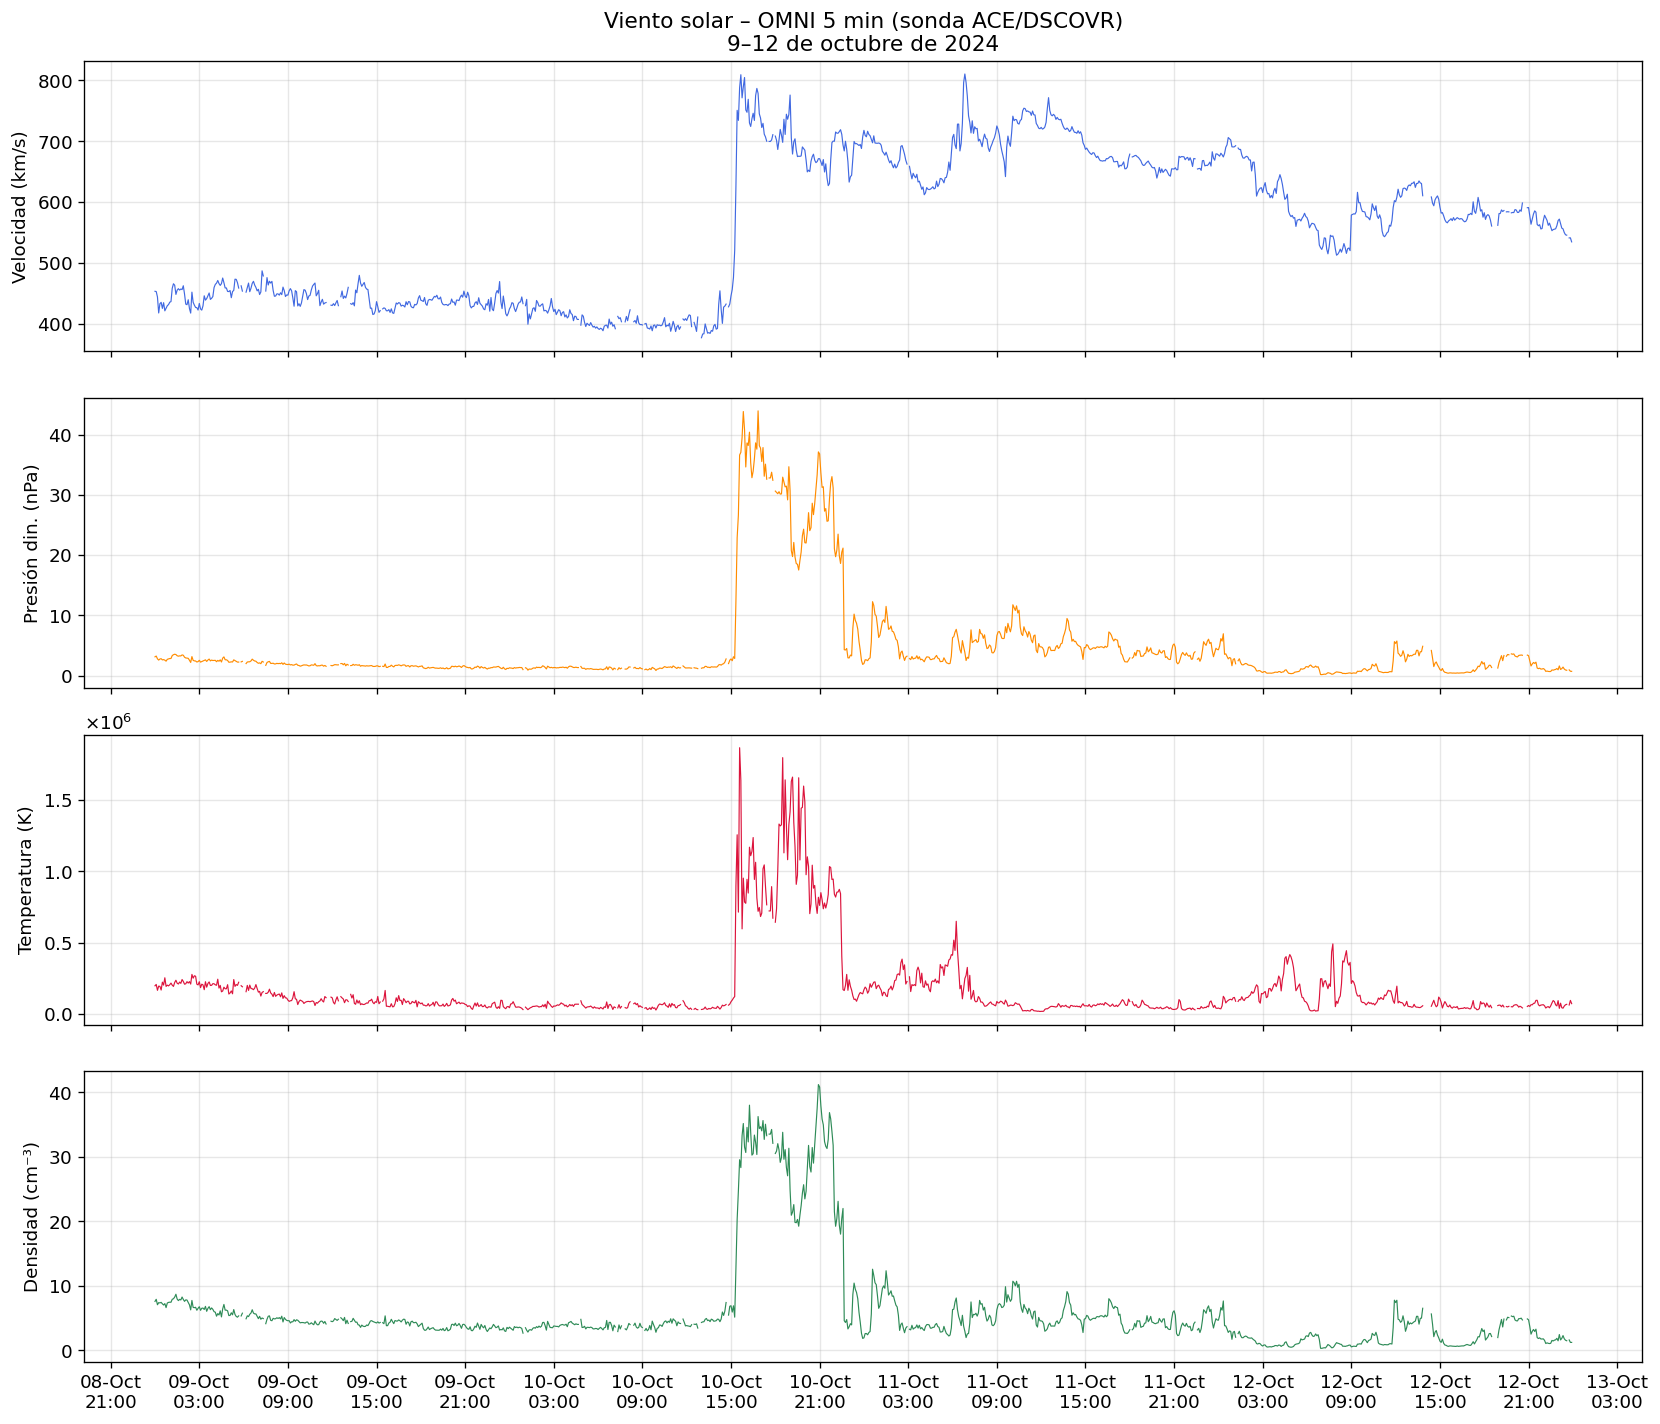

In [12]:
# ─── Gráfico Sec. 6: Viento solar ────────────────────────────────────────────
fig, axes = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

vars6 = [
    ('flow_speed',      'Velocidad (km/s)',   'royalblue'),
    ('Pressure',        'Presión din. (nPa)', 'darkorange'),
    ('T',               'Temperatura (K)',    'crimson'),
    ('proton_density',  'Densidad (cm⁻³)',    'seagreen'),
]

for ax, (col, label, color) in zip(axes, vars6):
    ax.plot(omni_df['time'], omni_df[col], color=color, linewidth=0.7)
    ax.set_ylabel(label)
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

axes[0].set_title('Viento solar – OMNI 5 min (sonda ACE/DSCOVR)\n9–12 de octubre de 2024')
fmt_xaxis(axes[-1])
plt.tight_layout()
plt.savefig('viento_solar_oct2024.png', dpi=150)
plt.show()

---
## 8. Flujo de protones energéticos (>10, >30 y >60 MeV)

Datos descargados manualmente del **ACE Science Center** (Caltech):  
https://izw1.caltech.edu/ACE/ASC/browse/view_browse_data.html  

Archivo: `ACE_Browse_Data (1).txt` — promedios horarios del instrumento **SIS**
(Solar Isotope Spectrometer) del satélite ACE.

| Columna | Descripción | Energía aproximada |
|---------|-------------|--------------------|
| `H_den_SWP` | Densidad protónica solar (SWEPAM), cm⁻³ | Viento solar |
| `H_lo_SIS`  | Flujo de protones (SIS), partículas cm⁻² s⁻¹ sr⁻¹ | ~10–30 MeV |
| `H_hi_SIS`  | Flujo de protones (SIS), partículas cm⁻² s⁻¹ sr⁻¹ | ~30+ MeV |

El formato del archivo usa **DOY fraccionario** (día del año) referido al año 2024
(año bisiesto → DOY 283 = 9 oct, DOY 284 = 10 oct, DOY 285 = 11 oct, DOY 286 = 12 oct).

In [13]:
import os
from datetime import datetime, timedelta

# ─── Lectura del archivo ACE Browse Data (descarga manual) ───────────────────
ACE_FILE = 'ACE_Browse_Data (1).txt'

def doy_to_datetime(year, doy_frac):
    """Convierte DOY fraccionario a datetime UTC."""
    base = datetime(year, 1, 1)
    return base + timedelta(days=doy_frac - 1)

if not os.path.exists(ACE_FILE):
    print(f'ARCHIVO NO ENCONTRADO: {ACE_FILE}')
    print('Descarga en: https://izw1.caltech.edu/ACE/ASC/browse/view_browse_data.html')
    ace_ok = False
else:
    with open(ACE_FILE, 'r') as f:
        lines = f.readlines()

    # Saltar cabecera hasta "BEGIN DATA"
    data_start = next((i + 1 for i, l in enumerate(lines) if 'BEGIN DATA' in l), None)

    if data_start is None:
        print('No se encontró la sección BEGIN DATA en el archivo.')
        ace_ok = False
    else:
        rows = []
        for line in lines[data_start:]:
            line = line.strip()
            if not line or line.startswith('#'):
                continue
            parts = line.split()
            if len(parts) >= 4:
                try:
                    rows.append({
                        'DOY':       float(parts[0]),
                        'H_den_SWP': float(parts[1]),
                        'H_lo_SIS':  float(parts[2]),
                        'H_hi_SIS':  float(parts[3]),
                    })
                except ValueError:
                    continue

        ace_raw = pd.DataFrame(rows)
        # Convertir DOY → datetime (2024, año bisiesto)
        ace_raw['time'] = ace_raw['DOY'].apply(lambda d: doy_to_datetime(2024, d))
        ace_raw['time'] = pd.to_datetime(ace_raw['time'])

        # Enmascarar valores negativos (fill values del instrumento)
        for col in ['H_den_SWP', 'H_lo_SIS', 'H_hi_SIS']:
            ace_raw[col] = ace_raw[col].where(ace_raw[col] > 0)

        # Filtrar Oct 9–12 (DOY 283 a <287)
        ace_df = ace_raw[(ace_raw['DOY'] >= 283) & (ace_raw['DOY'] < 287)].copy()
        ace_ok = True

        t_pico = ace_df.loc[ace_df['H_lo_SIS'].idxmax(), 'time']
        print(f'ACE Browse Data: {len(ace_raw)} registros totales en 2024')
        print(f'Período Oct 9–12:  {len(ace_df)} registros')
        print(f'  Pico H_lo_SIS (~10–30 MeV): {ace_df["H_lo_SIS"].max():.1f} pfu  '
              f'@ {t_pico.strftime("%d-%b %H:%M")} UT')
        print(f'  Pico H_hi_SIS (~30+ MeV):   {ace_df["H_hi_SIS"].max():.1f} pfu')
        print()
        print(ace_df[['time', 'DOY', 'H_lo_SIS', 'H_hi_SIS']].head(12).to_string(index=False))

ACE Browse Data: 8768 registros totales en 2024
Período Oct 9–12:  96 registros
  Pico H_lo_SIS (~10–30 MeV): 1629.8 pfu  @ 10-Oct 14:00 UT
  Pico H_hi_SIS (~30+ MeV):   94.6 pfu

                      time        DOY  H_lo_SIS  H_hi_SIS
2024-10-09 00:00:00.000000 283.000000    3.6132   0.76182
2024-10-09 00:59:59.078400 283.041656    3.3524   0.72546
2024-10-09 02:00:00.921600 283.083344    3.3538   0.81701
2024-10-09 03:00:00.000000 283.125000    7.9612   4.06890
2024-10-09 03:59:59.078400 283.166656   24.9500  15.84600
2024-10-09 05:00:00.921600 283.208344   60.6000  35.66200
2024-10-09 06:00:00.000000 283.250000  117.3200  54.55200
2024-10-09 06:59:59.078400 283.291656  221.5900  64.99500
2024-10-09 08:00:00.921600 283.333344  576.5900  91.30600
2024-10-09 09:00:00.000000 283.375000  626.7100  84.34400
2024-10-09 09:59:59.078400 283.416656  775.5000  84.53400
2024-10-09 11:00:00.921600 283.458344  994.4400  94.58600


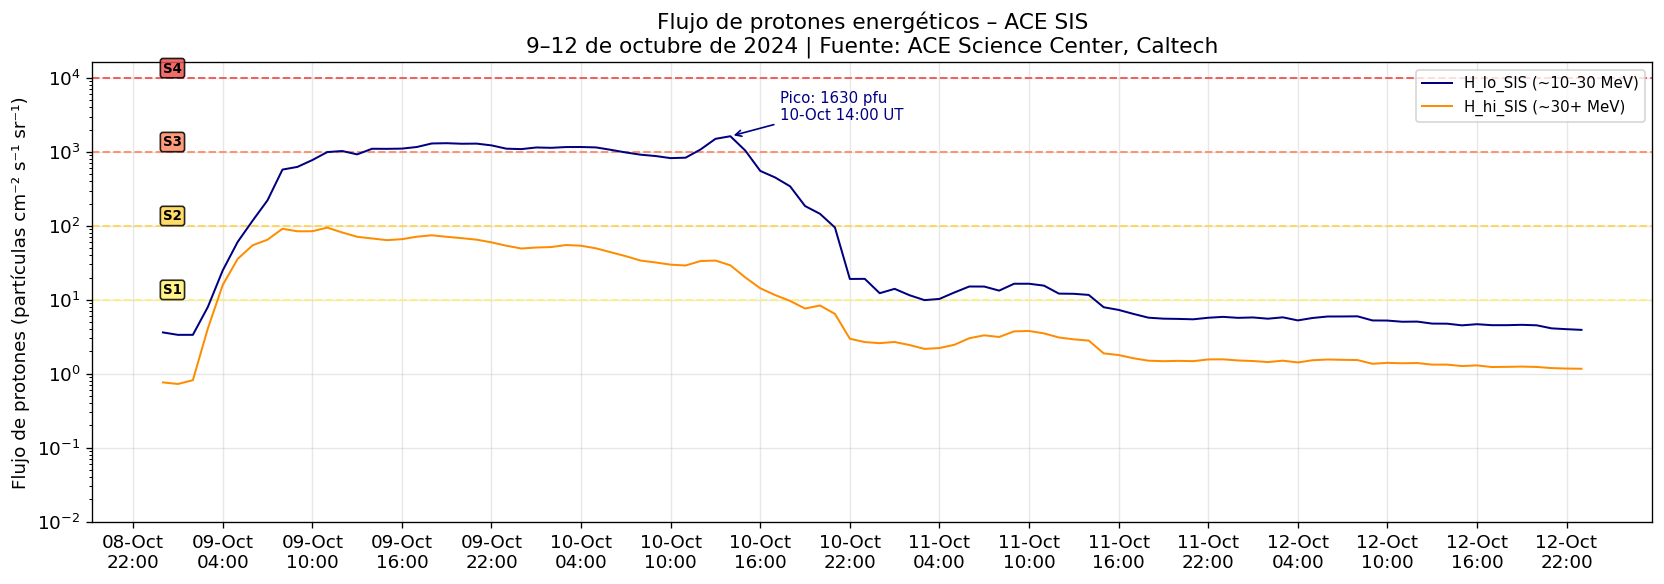

Pico H_lo_SIS = 1630 pfu  →  Clasificación NOAA SEP: nivel S3


In [14]:
# ─── Gráfico flujo de protones energéticos – ACE SIS ─────────────────────────
if ace_ok:
    fig, ax = plt.subplots(figsize=(14, 5))

    ax.semilogy(ace_df['time'], ace_df['H_lo_SIS'], color='navy', linewidth=1.2,
                label='H_lo_SIS (~10–30 MeV)', zorder=3)
    ax.semilogy(ace_df['time'], ace_df['H_hi_SIS'], color='darkorange', linewidth=1.2,
                label='H_hi_SIS (~30+ MeV)', zorder=3)

    # Umbrales de la escala S de NOAA (basados en flujo >10 MeV)
    s_levels = [(10, 'S1', '#FFF176'), (100, 'S2', '#FFD54F'),
                (1000, 'S3', '#FF8A65'), (10000, 'S4', '#EF5350')]
    for val, lbl, col in s_levels:
        ax.axhline(val, color=col, linestyle='--', linewidth=1.2, alpha=0.9)
        ax.text(ace_df['time'].min(), val * 1.2, lbl, fontsize=8, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.2', facecolor=col, alpha=0.85))

    # Anotación del pico
    idx_max = ace_df['H_lo_SIS'].idxmax()
    t_max   = ace_df.loc[idx_max, 'time']
    v_max   = ace_df.loc[idx_max, 'H_lo_SIS']
    ax.annotate(f'Pico: {v_max:.0f} pfu\n{t_max.strftime("%d-%b %H:%M")} UT',
                xy=(t_max, v_max), xytext=(30, 10), textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='navy'), color='navy', fontsize=9)

    ax.set_ylim(1e-2, max(v_max * 10, 1e4))
    ax.set_ylabel('Flujo de protones (partículas cm⁻² s⁻¹ sr⁻¹)')
    ax.set_title('Flujo de protones energéticos – ACE SIS\n'
                 '9–12 de octubre de 2024 | Fuente: ACE Science Center, Caltech')
    ax.legend(loc='upper right', fontsize=9)
    fmt_xaxis(ax)
    plt.tight_layout()
    plt.savefig('protones_oct2024.png', dpi=150)
    plt.show()

    pico = ace_df['H_lo_SIS'].max()
    nivel = ('S4' if pico >= 10000 else 'S3' if pico >= 1000 else
             'S2' if pico >= 100  else 'S1' if pico >= 10  else '<S1')
    print(f'Pico H_lo_SIS = {pico:.0f} pfu  →  Clasificación NOAA SEP: nivel {nivel}')
else:
    print('Sin datos ACE. Descarga el archivo en:')
    print('https://izw1.caltech.edu/ACE/ASC/browse/view_browse_data.html')

In [15]:
# ─── Resumen del evento SEP (Solar Energetic Particle) ───────────────────────
if ace_ok:
    pico_lo = ace_df['H_lo_SIS'].max()
    pico_hi = ace_df['H_hi_SIS'].max()
    t_pico  = ace_df.loc[ace_df['H_lo_SIS'].idxmax(), 'time']

    if pico_lo >= 100000:
        nivel_s = 'S5 (Extremo)'
    elif pico_lo >= 10000:
        nivel_s = 'S4 (Severo)'
    elif pico_lo >= 1000:
        nivel_s = 'S3 (Fuerte)'
    elif pico_lo >= 100:
        nivel_s = 'S2 (Moderado)'
    elif pico_lo >= 10:
        nivel_s = 'S1 (Menor)'
    else:
        nivel_s = 'Por debajo de S1 (< 10 pfu)'

    print('═' * 60)
    print('RESUMEN – Evento de Partículas Solares Energéticas (SEP)')
    print('═' * 60)
    print(f'  Instrumento:                  ACE SIS (Solar Isotope Spectrometer)')
    print(f'  Inicio del SEP:               ~9 oct 2024 (DOY 283)')
    print(f'  Hora del pico (H_lo_SIS):     {t_pico.strftime("%d-%b-%Y %H:%M")} UT')
    print(f'  Pico H_lo_SIS (~10–30 MeV):   {pico_lo:.1f}  partículas cm⁻² s⁻¹ sr⁻¹')
    print(f'  Pico H_hi_SIS (~30+  MeV):    {pico_hi:.1f}  partículas cm⁻² s⁻¹ sr⁻¹')
    print(f'  Clasificación NOAA (S-scale):  {nivel_s}')
    print(f'  Causa probable:               Fulguraciones X desde AR3848 (3–9 oct)')
    print('═' * 60)
else:
    print('Archivo ACE no encontrado. Ver instrucciones en la celda anterior.')

════════════════════════════════════════════════════════════
RESUMEN – Evento de Partículas Solares Energéticas (SEP)
════════════════════════════════════════════════════════════
  Instrumento:                  ACE SIS (Solar Isotope Spectrometer)
  Inicio del SEP:               ~9 oct 2024 (DOY 283)
  Hora del pico (H_lo_SIS):     10-Oct-2024 14:00 UT
  Pico H_lo_SIS (~10–30 MeV):   1629.8  partículas cm⁻² s⁻¹ sr⁻¹
  Pico H_hi_SIS (~30+  MeV):    94.6  partículas cm⁻² s⁻¹ sr⁻¹
  Clasificación NOAA (S-scale):  S3 (Fuerte)
  Causa probable:               Fulguraciones X desde AR3848 (3–9 oct)
════════════════════════════════════════════════════════════


---
## 9. Flujo de rayos X – Satélites GOES (SunPy)

Los satélites GOES de la NOAA monitorean continuamente el flujo de rayos X solar
en dos canales espectrales:

| Canal | Rango | Uso |
|-------|-------|-----|
| `xrsb` | 1–8 Å (largo) | Clasificación de fulguraciones (A, B, C, M, X) |
| `xrsa` | 0.5–4 Å (corto) | Indicador de emisión coronal caliente |

Datos descargados con **SunPy** (v7.0.4) vía `Fido` desde el repositorio NOAA NCEI:  
`sci_xrsf-l2-avg1m_g18_dYYYYMMDD_v2-2-1.nc` — promedios de 1 minuto, GOES-18.

Fuente: https://www.ngdc.noaa.gov/stp/satellite/goes/

In [16]:
from sunpy.net import Fido, attrs as a
from sunpy.timeseries import TimeSeries

# ─── Búsqueda: GOES-18, canal XRS, promedios de 1 minuto ─────────────────────
print('Buscando datos GOES-18 XRS en NOAA NCEI via SunPy...')
result = Fido.search(
    a.Time('2024-10-09T00:00:00', '2024-10-12T23:59:59'),
    a.Instrument('XRS'),
    a.goes.SatelliteNumber(18),
    a.Resolution('avg1m'),
)
print(result)

# ─── Descarga (usa caché local en ~/sunpy/data/) ───────────────────────────────
files = Fido.fetch(result, progress=False)
print(f'\nArchivos descargados: {len(files)}')
for f in files:
    print(f'  {f}')

# ─── Cargar como TimeSeries SunPy ─────────────────────────────────────────────
goes_ts = TimeSeries(files, source='XRSFluxTimeSeries', concatenate=True)

# Convertir a DataFrame pandas
xrs_df = goes_ts.to_dataframe().copy()
xrs_df.index = pd.to_datetime(xrs_df.index, utc=True)

# Filtrar registros con mala calidad (quality != 0)
xrs_df.loc[xrs_df['xrsa_quality'] != 0, 'xrsa'] = np.nan
xrs_df.loc[xrs_df['xrsb_quality'] != 0, 'xrsb'] = np.nan

print(f'\nRegistros totales: {len(xrs_df)}')
print(f'  xrsb (1-8 Å)   máximo: {xrs_df["xrsb"].max():.3e} W/m²')
print(f'  xrsa (0.5-4 Å) máximo: {xrs_df["xrsa"].max():.3e} W/m²')
print()

# Clasificar el máximo de xrsb
peak = xrs_df['xrsb'].max()
if   peak >= 1e-3: clase_peak = f'X{peak/1e-4:.1f}'
elif peak >= 1e-4: clase_peak = f'X{peak/1e-4:.1f}'
elif peak >= 1e-5: clase_peak = f'M{peak/1e-5:.1f}'
elif peak >= 1e-6: clase_peak = f'C{peak/1e-6:.1f}'
elif peak >= 1e-7: clase_peak = f'B{peak/1e-7:.1f}'
else:              clase_peak = f'A{peak/1e-8:.1f}'
t_peak = xrs_df['xrsb'].idxmax()
print(f'Fulguración más intensa del período: {clase_peak}  @ {t_peak.strftime("%d-%b %H:%M")} UT')
xrs_ok = True

Buscando datos GOES-18 XRS en NOAA NCEI via SunPy...


Results from 1 Provider:

4 Results from the XRSClient:
Source: <8: https://umbra.nascom.nasa.gov/goes/fits 
8-15: https://www.ncei.noaa.gov/data/goes-space-environment-monitor/access/science/ 
16-17: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/

       Start Time               End Time        Instrument  Physobs   Source Provider Resolution SatelliteNumber
----------------------- ----------------------- ---------- ---------- ------ -------- ---------- ---------------
2024-10-09 00:00:00.000 2024-10-09 23:59:59.999        XRS irradiance   GOES     NOAA      avg1m              18
2024-10-10 00:00:00.000 2024-10-10 23:59:59.999        XRS irradiance   GOES     NOAA      avg1m              18
2024-10-11 00:00:00.000 2024-10-11 23:59:59.999        XRS irradiance   GOES     NOAA      avg1m              18
2024-10-12 00:00:00.000 2024-10-12 23:59:59.999        XRS irradiance   GOES     NOAA      avg1m              18





Archivos descargados: 4
  /home/erick/sunpy/data/sci_xrsf-l2-avg1m_g18_d20241009_v2-2-1.nc
  /home/erick/sunpy/data/sci_xrsf-l2-avg1m_g18_d20241010_v2-2-1.nc
  /home/erick/sunpy/data/sci_xrsf-l2-avg1m_g18_d20241011_v2-2-1.nc
  /home/erick/sunpy/data/sci_xrsf-l2-avg1m_g18_d20241012_v2-2-1.nc

Registros totales: 5760
  xrsb (1-8 Å)   máximo: 1.799e-04 W/m²
  xrsa (0.5-4 Å) máximo: 4.248e-05 W/m²

Fulguración más intensa del período: X1.8  @ 09-Oct 01:56 UT


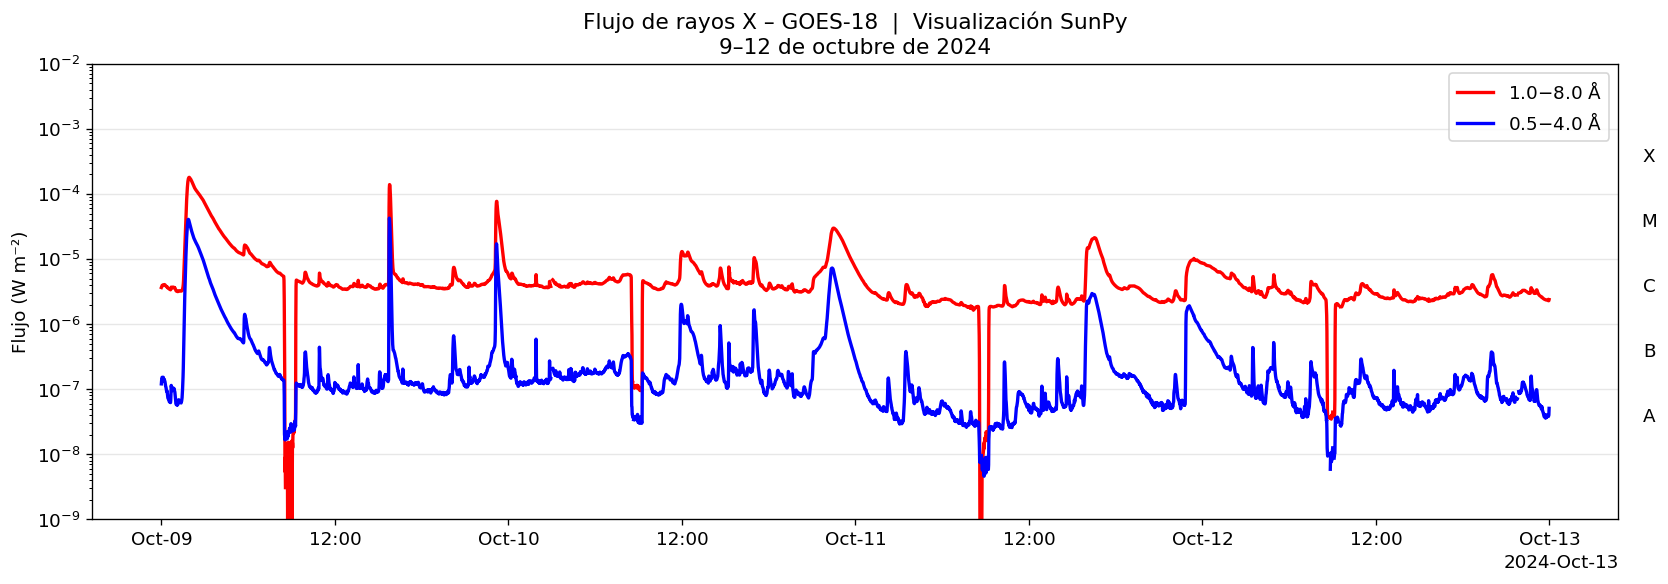

In [17]:
# ─── Gráfico nativo SunPy ──────────────────────────────────────────────────────
fig_sp = plt.figure(figsize=(14, 5))
ax_sp  = fig_sp.add_subplot(111)
goes_ts.plot(axes=ax_sp, columns=['xrsb', 'xrsa'])
ax_sp.set_title('Flujo de rayos X – GOES-18  |  Visualización SunPy\n9–12 de octubre de 2024')
ax_sp.set_ylabel('Flujo (W m⁻²)')
plt.tight_layout()
plt.savefig('xray_sunpy_native.png', dpi=150)
plt.show()

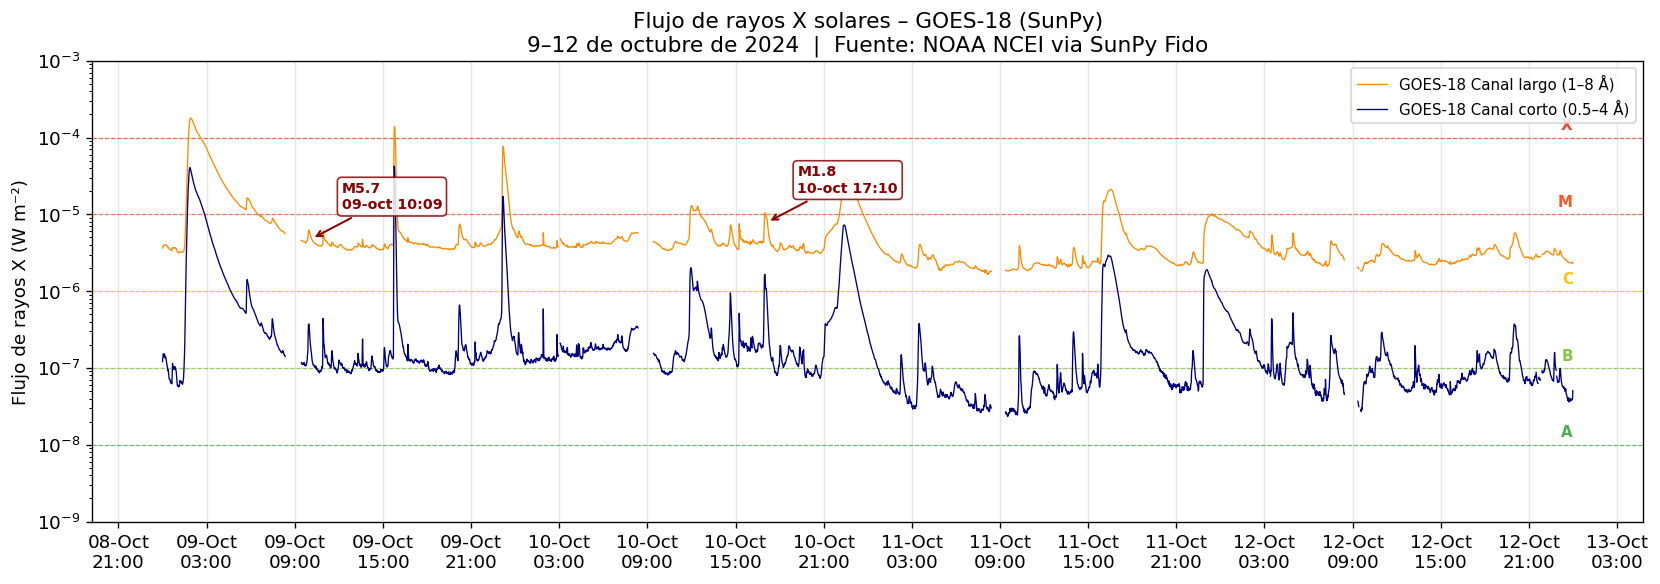

Gráfico guardado: xray_goes_oct2024.png


In [18]:
# ─── Gráfico personalizado rayos X GOES – matplotlib ──────────────────────────
if xrs_ok:
    fig, ax = plt.subplots(figsize=(14, 5))

    # Canales XRS (columnas de SunPy: xrsb = 1-8 Å, xrsa = 0.5-4 Å)
    ax.semilogy(xrs_df.index, xrs_df['xrsb'], color='darkorange', linewidth=0.8,
                label='GOES-18 Canal largo (1–8 Å)', zorder=3)
    ax.semilogy(xrs_df.index, xrs_df['xrsa'], color='navy', linewidth=0.8,
                label='GOES-18 Canal corto (0.5–4 Å)', zorder=3)

    # ── Líneas horizontales de clases de fulguraciones ──────────────────────
    clases = [
        ('A', 1e-8, '#4CAF50'),
        ('B', 1e-7, '#8BC34A'),
        ('C', 1e-6, '#FFC107'),
        ('M', 1e-5, '#FF5722'),
        ('X', 1e-4, '#F44336'),
    ]
    for name, val, col in clases:
        ax.axhline(val, color=col, linewidth=0.7, linestyle='--', alpha=0.8, zorder=2)
        ax.text(xrs_df.index.max(), val * 1.15, name,
                color=col, fontsize=9, fontweight='bold', va='bottom', ha='right')

    # ── Anotaciones de fulguraciones conocidas del período ──────────────────
    flares_xray = [
        (pd.Timestamp('2024-10-09 10:09', tz='UTC'), 'M5.7\n09-oct 10:09'),
        (pd.Timestamp('2024-10-10 17:10', tz='UTC'), 'M1.8\n10-oct 17:10'),
    ]
    for t_flare, label in flares_xray:
        # Buscar el valor real más cercano en el DataFrame
        diffs = np.abs((xrs_df.index - t_flare).total_seconds())
        idx_closest = int(np.argmin(diffs))
        t_real = xrs_df.index[idx_closest]
        v_real = xrs_df['xrsb'].iloc[idx_closest]
        if pd.notna(v_real):
            ax.annotate(label,
                        xy=(t_real, v_real),
                        xytext=(18, 18), textcoords='offset points',
                        arrowprops=dict(arrowstyle='->', color='darkred', lw=1.2),
                        color='darkred', fontsize=8.5, fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='white',
                                  edgecolor='darkred', alpha=0.85))

    ax.set_ylim(1e-9, 1e-3)
    ax.set_ylabel('Flujo de rayos X (W m⁻²)')
    ax.set_title('Flujo de rayos X solares – GOES-18 (SunPy)\n'
                 '9–12 de octubre de 2024  |  Fuente: NOAA NCEI via SunPy Fido')
    ax.legend(loc='upper right', fontsize=9)
    fmt_xaxis(ax)
    plt.tight_layout()
    plt.savefig('xray_goes_oct2024.png', dpi=150)
    plt.show()
    print('Gráfico guardado: xray_goes_oct2024.png')
else:
    print('xrs_df no disponible. Ejecuta primero la celda de descarga SunPy.')

---
## 10. Catálogo CACTUS – CMEs del 7 de octubre de 2024

**CACTUS** (Computer Aided CME Tracking) detecta y caracteriza CMEs automáticamente
en imágenes del coronógrafo **SOHO/LASCO C2 y C3** (SIDC, Bélgica).

Fuente catálogo: https://www.sidc.be/cactus/catalog.php  
Catálogo LASCO oct 2024: https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2024/10/

Parámetros del catálogo:
| Columna | Descripción |
|---------|-------------|
| `t0`   | Tiempo de inicio de la CME (primera aparición en C2) |
| `pa`   | Ángulo de posición central (°, N=0, E=90, S=180, W=270) |
| `da`   | Ancho angular (°); ≥ 360 = halo completo |
| `v`    | Velocidad mediana (km/s) |
| `dv`   | Incertidumbre en velocidad (km/s) |
| tipo   | `II` = halo parcial (da > 120°) |

Se identificaron dos CMEs relevantes el **7 de octubre**:
- **CME0045** (t0 = 20:48 UT): CME angosta hacia el W, v = 520 km/s
- **CME0047** (t0 = 22:12 UT): **Halo parcial** (da = 166°), v = 446 km/s — tipo II

In [19]:
# ─── Descarga y parseo del catálogo cmecat.txt de CACTUS ─────────────────────
CACTUS_BASE = 'https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2024/10/'

try:
    r = requests.get(CACTUS_BASE + 'cmecat.txt', timeout=30)
    r.raise_for_status()
    cat_lines = r.text.splitlines()

    rows = []
    for line in cat_lines:
        line = line.strip()
        if not line or line.startswith('#'):
            continue
        # Formato: id|t0|dt0|pa|da|v|dv|minv|maxv|type
        parts = [p.strip() for p in line.split('|')]
        if len(parts) >= 9:
            try:
                rows.append({
                    'CME':    parts[0].strip(),
                    't0':     parts[1].strip(),
                    'dt0':    int(parts[2]),
                    'pa':     int(parts[3]),
                    'da':     int(parts[4]),
                    'v':      int(parts[5]),
                    'dv':     int(parts[6]),
                    'minv':   int(parts[7]),
                    'maxv':   int(parts[8]),
                    'tipo':   parts[9].strip() if len(parts) > 9 else '',
                })
            except (ValueError, IndexError):
                continue

    cme_cat = pd.DataFrame(rows)
    cme_cat['t0'] = pd.to_datetime(cme_cat['t0'], format='%Y/%m/%d %H:%M')

    # Filtrar Oct 5–10 (período de interés)
    mask = (cme_cat['t0'] >= '2024-10-05') & (cme_cat['t0'] <= '2024-10-10 23:59')
    cme_oct = cme_cat[mask].copy().reset_index(drop=True)
    print(f'CMEs en el catálogo CACTUS (5–10 oct 2024): {len(cme_oct)}')
    print(f'Total en octubre 2024: {len(cme_cat)}\n')

    # Mostrar tabla con destacado de CME0045 y CME0047
    def highlight_cme(row):
        if row['CME'] == '0047':
            return ['background-color: #ffcccc'] * len(row)
        elif row['CME'] == '0045':
            return ['background-color: #fff3cd'] * len(row)
        return [''] * len(row)

    display(cme_oct[['CME','t0','pa','da','v','dv','tipo']].style
            .apply(highlight_cme, axis=1)
            .set_caption('Catálogo CACTUS – CMEs del 5 al 10 de octubre de 2024  |  '
                         'Rojo = CME0047 (halo parcial 166°)  |  Amarillo = CME0045 (link usuario)')
            .format({'t0': lambda x: x.strftime('%d-%b %H:%M')}))

    cactus_ok = True

except Exception as e:
    print(f'No se pudo descargar cmecat.txt: {e}')
    cactus_ok = False

CMEs en el catálogo CACTUS (5–10 oct 2024): 30
Total en octubre 2024: 149



,CME,t0,pa,da,v,dv,tipo
0,0055,09-Oct 17:00,24,50,114,196,
1,0054,09-Oct 14:12,280,30,477,92,
2,0053,09-Oct 14:12,251,12,335,38,
3,0052,09-Oct 02:12,352,30,390,77,
4,0051,08-Oct 15:12,240,10,175,57,
5,0050,08-Oct 09:12,101,60,284,26,
6,0049,08-Oct 07:12,284,10,359,154,
7,0048,08-Oct 06:12,217,32,496,117,
8,0047,07-Oct 22:12,90,166,446,79,II
9,0046,07-Oct 22:12,338,30,446,83,



─────────────────────────────────────────────────────────────────
CME0045 – t0: 07-oct 20:48 UT | v=520 km/s | da=20° | pa=283° (W)
─────────────────────────────────────────────────────────────────
https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2024/10/CME0045/CME.jpeg


https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2024/10/CME0045/speed.png


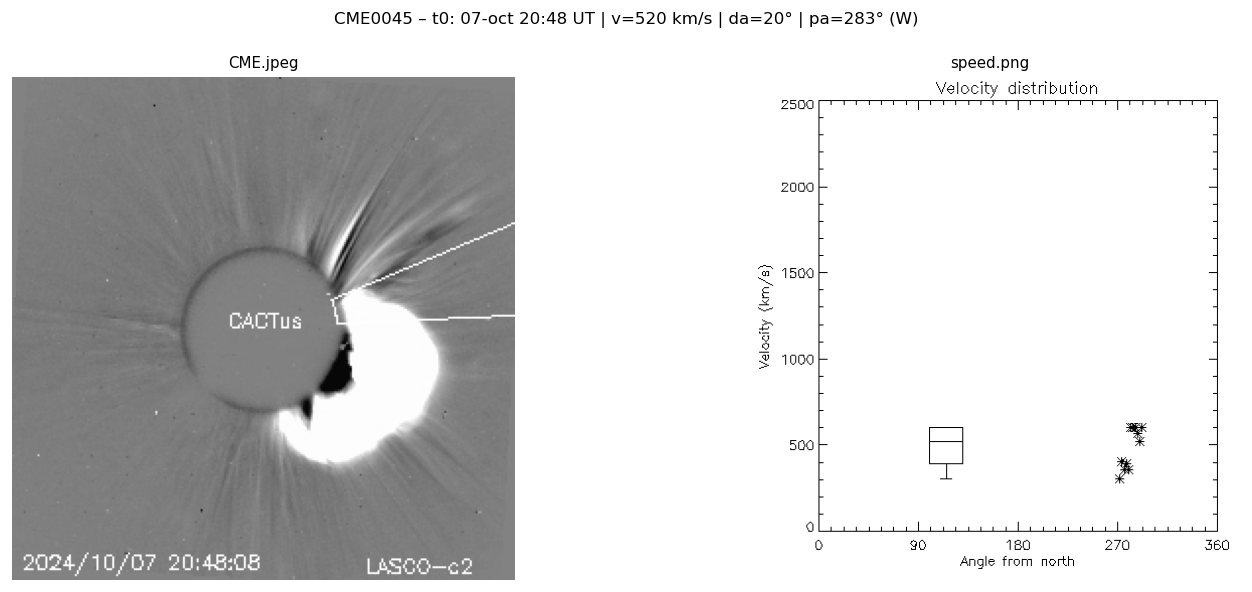

Guardado: cactus_cme0045.png

─────────────────────────────────────────────────────────────────
CME0047 – t0: 07-oct 22:12 UT | v=446 km/s | da=166° (halo parcial II) | pa=090°
─────────────────────────────────────────────────────────────────
https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2024/10/CME0047/CME.jpeg


https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2024/10/CME0047/speed.png


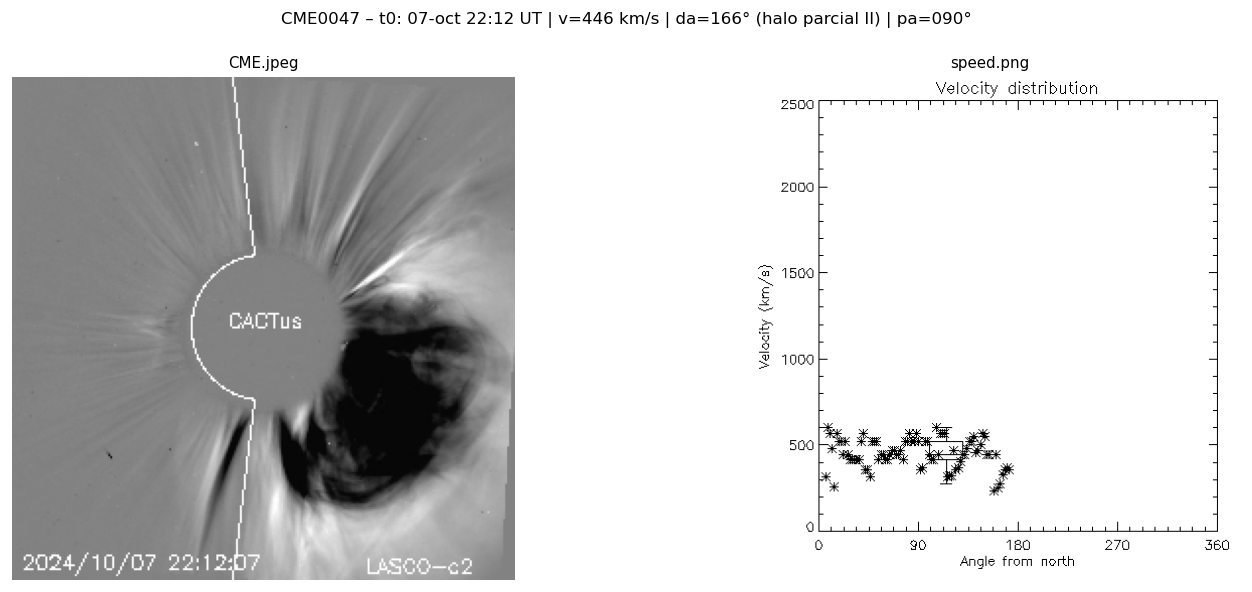

Guardado: cactus_cme0047.png

══════════════════════════════════════════════════════════════════════
RESUMEN – CMEs del 7 de octubre 2024 (Catálogo CACTUS/SIDC)
══════════════════════════════════════════════════════════════════════
  CME      t0 (UT)          pa(°)    da(°)    v(km/s)    Tipo   Nota
  ------------------------------------------------------------------
  CME0043  07-oct 04:00     291      8        400        —      Primera CME tras la X1.8 (02:20 UT)
  CME0044  07-oct 19:12     246      26       456        —      CME hacia el SW
► CME0045  07-oct 20:48     283      20       520        —      ← Link proporcionado por usuario
  CME0046  07-oct 22:12     338      30       446        —      CME NW
► CME0047  07-oct 22:12     90       166      446        II     ★ Halo parcial (da=166°) — más geoefectiva
══════════════════════════════════════════════════════════════════════

Nota: CACTUS no registra una CME de halo completo (da=360°) el 7-oct.
CME0047 (da=166°, tipo II) es el 

In [20]:
from IPython.display import Image, display as ipy_display
import io
from PIL import Image

# ─── Imágenes CACTUS: CME0045 (link usuario) y CME0047 (halo parcial) ────────
CACTUS_BASE = 'https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2024/10/'

for cme_id, label in [('CME0045', 'CME0045 – t0: 07-oct 20:48 UT | v=520 km/s | da=20° | pa=283° (W)'),
                       ('CME0047', 'CME0047 – t0: 07-oct 22:12 UT | v=446 km/s | da=166° (halo parcial II) | pa=090°')]:
    print(f'\n{"─"*65}')
    print(label)
    print('─'*65)

    fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    fig.suptitle(label, fontsize=10)

    for ax, img_name in zip(axes, ['CME.jpeg', 'speed.png']):
        url = f'{CACTUS_BASE}{cme_id}/{img_name}'
        print(url)
        try:
            resp = requests.get(url, timeout=20)
            resp.raise_for_status()
            #img = plt.imread(io.BytesIO(resp.content))
            img = Image.open(io.BytesIO(resp.content)).convert("RGB")
            ax.imshow(img)
            ax.set_title(img_name, fontsize=9)
            ax.axis('off')
        except Exception as e:
            ax.text(0.5, 0.5, f'No disponible\n{img_name}\n{e}',
                    ha='center', va='center', transform=ax.transAxes, fontsize=8)
            ax.axis('off')

    plt.tight_layout()
    out_name = f'cactus_{cme_id.lower()}.png'
    plt.savefig(out_name, dpi=120, bbox_inches='tight')
    plt.show()
    print(f'Guardado: {out_name}')

# ─── Tabla resumen CMEs relevantes del 7 de octubre ──────────────────────────
print('\n' + '═'*70)
print('RESUMEN – CMEs del 7 de octubre 2024 (Catálogo CACTUS/SIDC)')
print('═'*70)
cmes_oct7 = [
    ('CME0043', '07-oct 04:00', 291,   8, 400, '—',  'Primera CME tras la X1.8 (02:20 UT)'),
    ('CME0044', '07-oct 19:12', 246,  26, 456, '—',  'CME hacia el SW'),
    ('CME0045', '07-oct 20:48', 283,  20, 520, '—',  '← Link proporcionado por usuario'),
    ('CME0046', '07-oct 22:12', 338,  30, 446, '—',  'CME NW'),
    ('CME0047', '07-oct 22:12',  90, 166, 446, 'II', '★ Halo parcial (da=166°) — más geoefectiva'),
]
print(f'  {"CME":<8} {"t0 (UT)":<16} {"pa(°)":<8} {"da(°)":<8} {"v(km/s)":<10} {"Tipo":<6} Nota')
print('  ' + '-'*66)
for cme_id, t0, pa, da, v, tipo, nota in cmes_oct7:
    marker = '►' if cme_id in ('CME0045', 'CME0047') else ' '
    print(f'{marker} {cme_id:<8} {t0:<16} {pa:<8} {da:<8} {v:<10} {tipo:<6} {nota}')
print('═'*70)
print()
print('Nota: CACTUS no registra una CME de halo completo (da=360°) el 7-oct.')
print('CME0047 (da=166°, tipo II) es el halo parcial más relevante de ese día.')
print('Según NASA DONKI, el halo completo asociado a la X1.8 apareció el 9-oct')
print('(entrada DONKI 2024-10-09T02:12Z, v=1509–2112 km/s).')
print()
print('Referencia CACTUS: https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2024/10/')
print('Referencia DONKI:  https://kauai.ccmc.gsfc.nasa.gov/DONKI/search/')

---
## 11. Modelo de viento solar ENLIL (WSA-ENLIL+Cone)

El modelo **WSA-ENLIL+Cone** es un modelo numérico de MHD que simula la propagación del viento solar y las CMEs desde la corona solar hasta la Tierra.

**Fuente:** NASA CCMC DONKI – https://kauai.ccmc.gsfc.nasa.gov/DONKI/search/

El modelo se ejecutó con la CME del 7 de octubre como condición inicial.

> **Para visualizar el modelo ENLIL del evento:**
> 1. Ir a https://kauai.ccmc.gsfc.nasa.gov/DONKI/search/
> 2. Buscar por fecha: **07 oct 2024** → tipo: **CME**
> 3. Seleccionar el evento X1.8 y buscar la simulación ENLIL asociada
> 4. Ver animación WSA-ENLIL+Cone en la sección "Simulation"

In [21]:
# ─── Consulta DONKI API para CMEs de oct 2024 ─────────────────────────────────
DONKI_URL = (
    'https://kauai.ccmc.gsfc.nasa.gov/DONKI/WS/get/CME'
    '?startDate=2024-10-05'
    '&endDate=2024-10-10'
)
try:
    r = requests.get(DONKI_URL, timeout=30)
    r.raise_for_status()
    cmes = r.json()
    print(f'CMEs registradas en DONKI (5-10 oct 2024): {len(cmes)}')
    for cme in cmes:
        print(f"  [{cme.get('startTime','')}] "
              f"Nota: {cme.get('note','')[:80]}")
        for analysis in cme.get('cmeAnalyses', []):
            tipo = analysis.get('type', '')
            speed = analysis.get('speed', '')
            half_angle = analysis.get('halfAngle', '')
            print(f"    → Tipo: {tipo} | Velocidad: {speed} km/s | Semi-ángulo: {half_angle}°")
except Exception as e:
    print(f'Error consultando DONKI: {e}')

CMEs registradas en DONKI (5-10 oct 2024): 26
  [2024-10-05T02:12Z] Nota: A very diffuse front with many follow up emission. The source may be a broad fie
    → Tipo: S | Velocidad: 314.0 km/s | Semi-ángulo: 23.0°
  [2024-10-05T06:00Z] Nota: A very faint front only seen in running difference imagery from SOHO (C2 and C3)
    → Tipo: S | Velocidad: 384.0 km/s | Semi-ángulo: 34.0°
  [2024-10-05T07:12Z] Nota: A very faint and narrow outflow to the south and southwest.  The source has not 
    → Tipo: C | Velocidad: 669.0 km/s | Semi-ángulo: 14.0°
  [2024-10-05T12:00Z] Nota: CME seen to the SW in all coronagraphs. The source for this CME is uncertain, wi
    → Tipo: C | Velocidad: 675.0 km/s | Semi-ángulo: 24.0°
  [2024-10-05T13:48Z] Nota: CME seen to the SW in SOHO LASCO C2/C3, and in STEREO COR2A white light imagery.
    → Tipo: C | Velocidad: 614.0 km/s | Semi-ángulo: 24.0°
  [2024-10-05T16:48Z] Nota: A very faint front - one of multiple faint fronts today - that is mainly seen in
    →

In [22]:
# ─── Descripción del modelo ENLIL ─────────────────────────────────────────────
enlil_info = {
    'Modelo':           'WSA-ENLIL + Cone',
    'Tipo':             'MHD heliosphérico (1D/3D)',
    'Dominio':          '0.1 – 2.0 AU',
    'CME del evento':   '07-oct-2024 ~02:30 UT (AR3848, X1.8)',
    'Velocidad inicial':'~1200 km/s',
    'Predicción impacto':'10-oct-2024 ~10–14 UT',
    'Fuente visualización': 'https://kauai.ccmc.gsfc.nasa.gov/DONKI/search/',
    'Centro':'NASA CCMC (Community Coordinated Modeling Center)',
}

print('─'*55)
print('MODELO WSA-ENLIL – Tormenta del 10-11 de octubre de 2024')
print('─'*55)
for k, v in enlil_info.items():
    print(f'  {k:<25}: {v}')
print('─'*55)
print()
print('Instrucciones para visualizar la animación:')
print('1. Ir a https://kauai.ccmc.gsfc.nasa.gov/DONKI/search/')
print('2. Tipo: CME | Fecha inicio: 2024-10-07 | Fin: 2024-10-08')
print('3. Click en el evento X1.8 → sección "Simulation" → ver ENLIL')

───────────────────────────────────────────────────────
MODELO WSA-ENLIL – Tormenta del 10-11 de octubre de 2024
───────────────────────────────────────────────────────
  Modelo                   : WSA-ENLIL + Cone
  Tipo                     : MHD heliosphérico (1D/3D)
  Dominio                  : 0.1 – 2.0 AU
  CME del evento           : 07-oct-2024 ~02:30 UT (AR3848, X1.8)
  Velocidad inicial        : ~1200 km/s
  Predicción impacto       : 10-oct-2024 ~10–14 UT
  Fuente visualización     : https://kauai.ccmc.gsfc.nasa.gov/DONKI/search/
  Centro                   : NASA CCMC (Community Coordinated Modeling Center)
───────────────────────────────────────────────────────

Instrucciones para visualizar la animación:
1. Ir a https://kauai.ccmc.gsfc.nasa.gov/DONKI/search/
2. Tipo: CME | Fecha inicio: 2024-10-07 | Fin: 2024-10-08
3. Click en el evento X1.8 → sección "Simulation" → ver ENLIL


---
## Resumen de la Tormenta

| Parámetro | Valor |
|-----------|-------|
| Clasificación NOAA | **G4 (Severa)** |
| Kp máximo | **8** |
| Dst (SYM-H) mínimo | **~−200 nT** |
| Fulguración origen | **X1.8** – 7 oct 2024 (AR3848) |
| CME halo | 7 oct ~02:30 UT – ~1200 km/s |
| Impacto en Tierra | 10 oct ~12:00 UT |
| Bz mínimo | **< −30 nT** |
| Velocidad viento solar máx. | **~700–900 km/s** |
| Duración tormenta principal | ~12 horas |
| Fase de recuperación | ~48 horas |

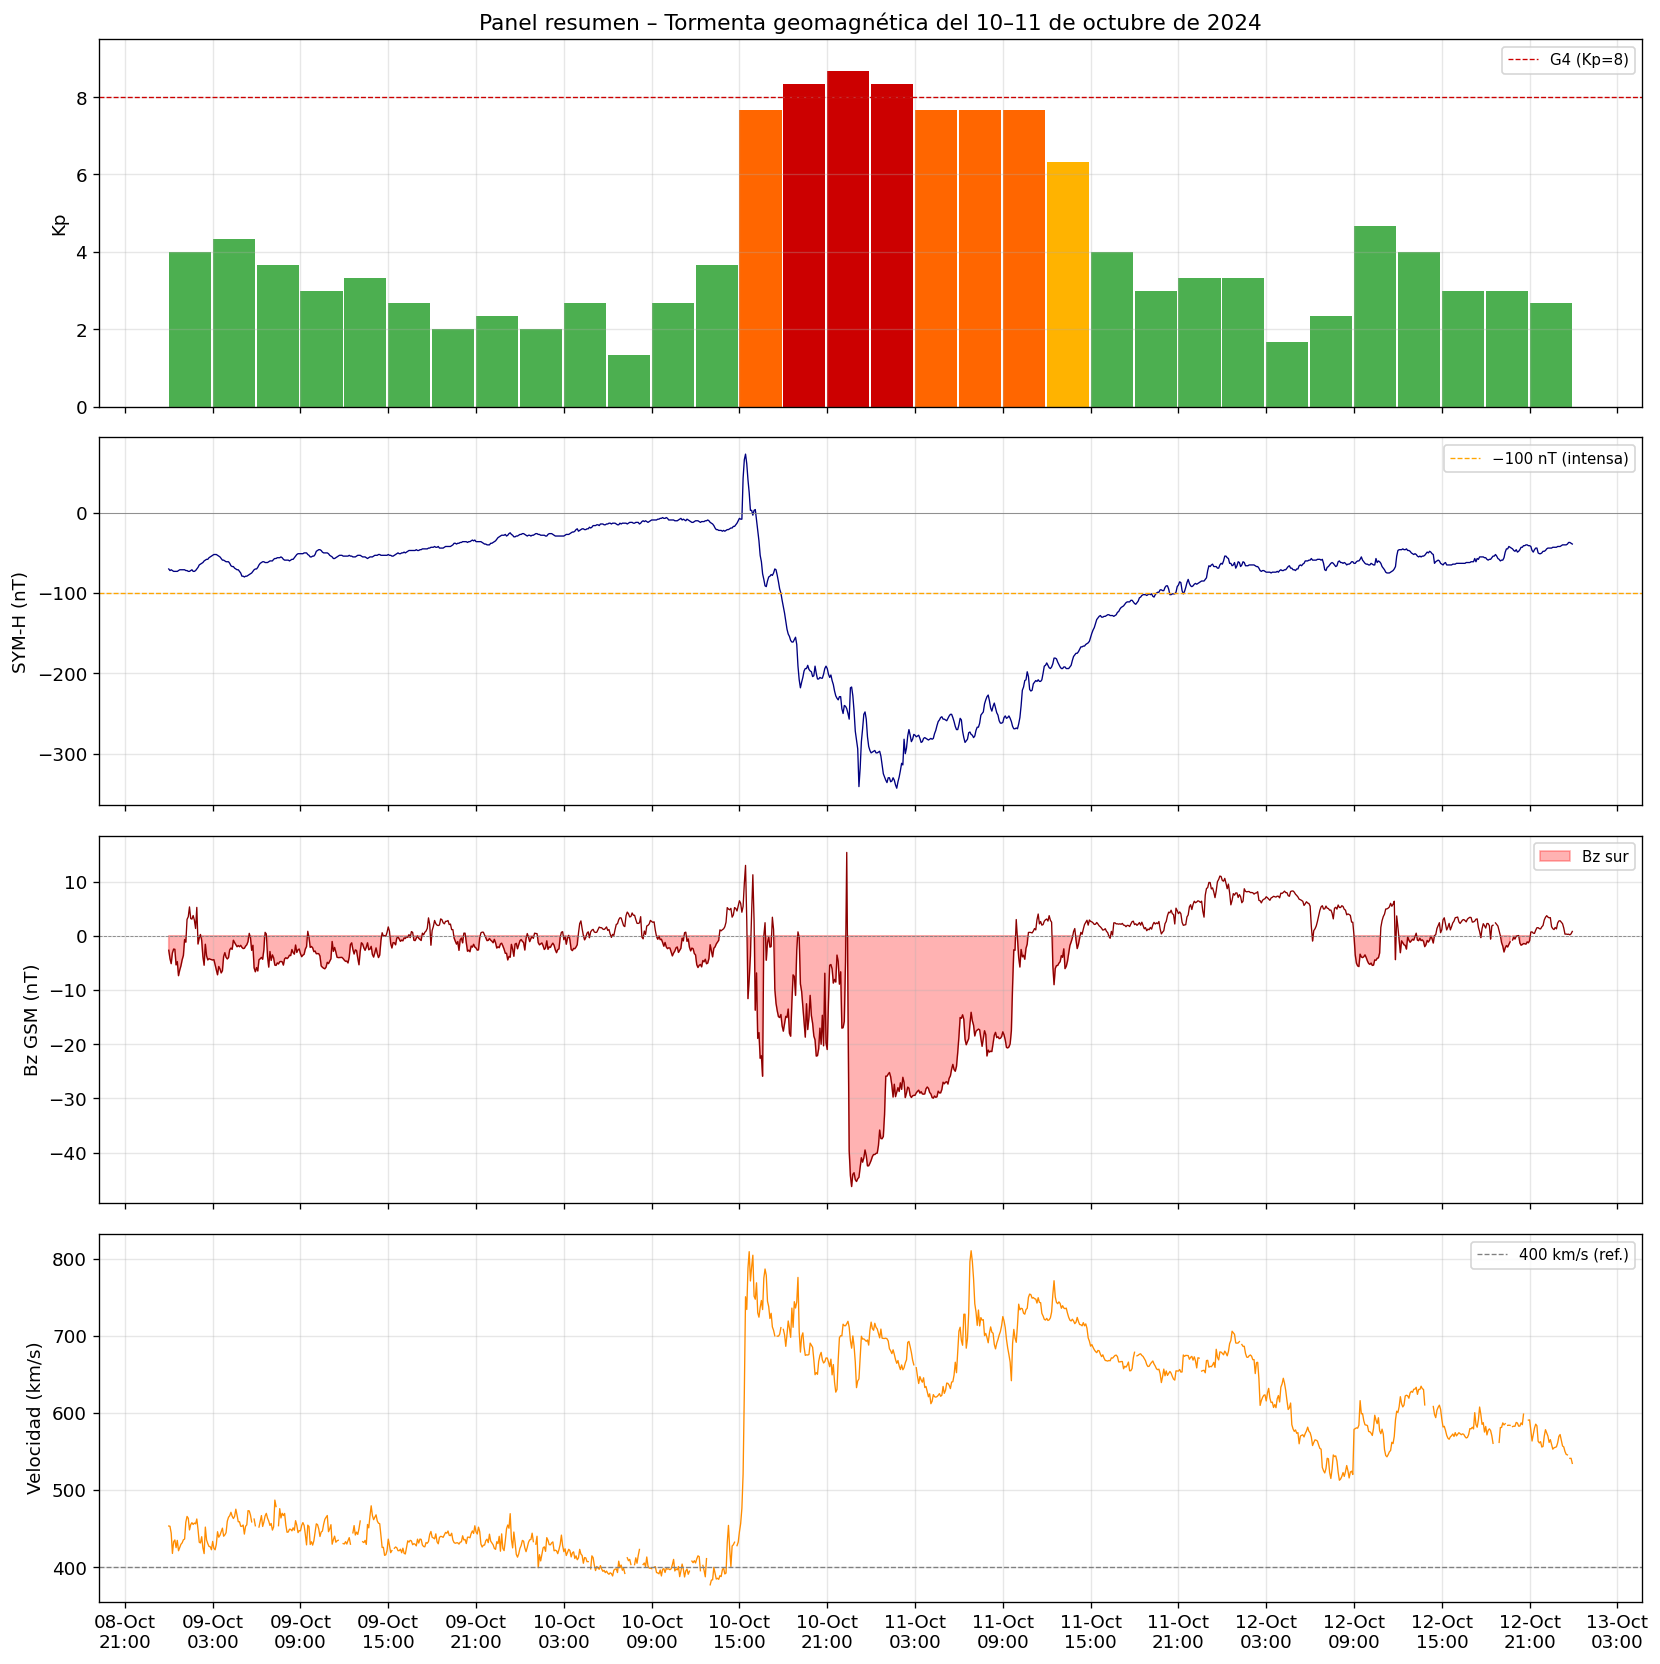

Panel guardado: panel_resumen_oct2024.png


In [23]:

# ─── Panel resumen: Kp, SYM-H, Bz, Velocidad ─────────────────────────────────
fig, axes = plt.subplots(4, 1, figsize=(14, 14), sharex=True)

# Kp (barras)
kp_c = ['#CC0000' if k>=8 else '#FF6600' if k>=7 else '#FFB300' if k>=6
        else '#00AA00' if k>=5 else '#4CAF50' for k in kp_df['Kp']]
axes[0].bar(kp_df['datetime'], kp_df['Kp'], width=0.12, color=kp_c, align='edge')
axes[0].set_ylim(0, 9.5)
axes[0].set_ylabel('Kp')
axes[0].axhline(8, color='#CC0000', linestyle='--', linewidth=0.8, label='G4 (Kp=8)')
axes[0].legend(fontsize=9)
axes[0].set_title('Panel resumen – Tormenta geomagnética del 10–11 de octubre de 2024', fontsize=13)

# SYM-H (proxy Dst)
axes[1].plot(omni_df['time'], omni_df['SYM_H'], color='navy', linewidth=0.8)
axes[1].axhline(0,    color='gray',   linewidth=0.5)
axes[1].axhline(-100, color='orange', linestyle='--', linewidth=0.8, label='−100 nT (intensa)')
axes[1].set_ylabel('SYM-H (nT)')
axes[1].legend(fontsize=9)

# Bz GSM
axes[2].plot(omni_df['time'], omni_df['BZ_GSM'], color='darkred', linewidth=0.8)
axes[2].axhline(0, color='gray', linewidth=0.5, linestyle='--')
axes[2].fill_between(omni_df['time'], omni_df['BZ_GSM'], 0,
                     where=omni_df['BZ_GSM'] < 0, alpha=0.3, color='red', label='Bz sur')
axes[2].set_ylabel('Bz GSM (nT)')
axes[2].legend(fontsize=9)

# Velocidad del viento solar
axes[3].plot(omni_df['time'], omni_df['flow_speed'], color='darkorange', linewidth=0.8)
axes[3].axhline(400, color='gray', linestyle='--', linewidth=0.8, label='400 km/s (ref.)')
axes[3].set_ylabel('Velocidad (km/s)')
axes[3].legend(fontsize=9)

fmt_xaxis(axes[-1])
plt.tight_layout()
plt.savefig('panel_resumen_oct2024.png', dpi=150, bbox_inches='tight')
plt.show()
print('Panel guardado: panel_resumen_oct2024.png')